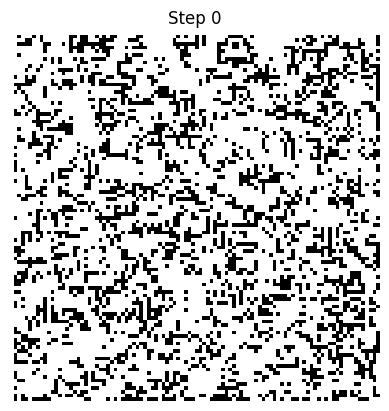

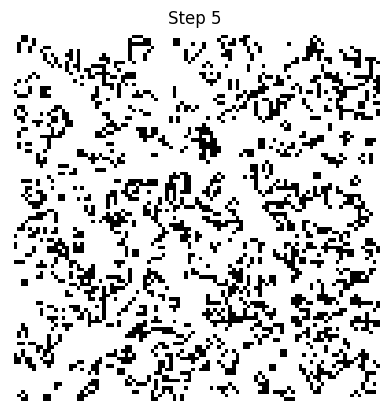

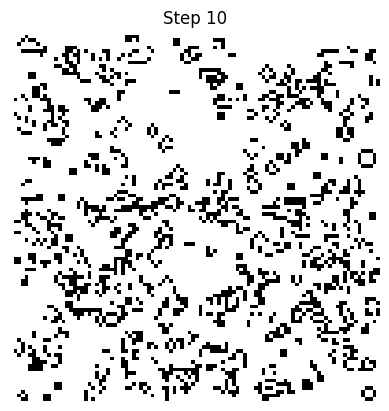

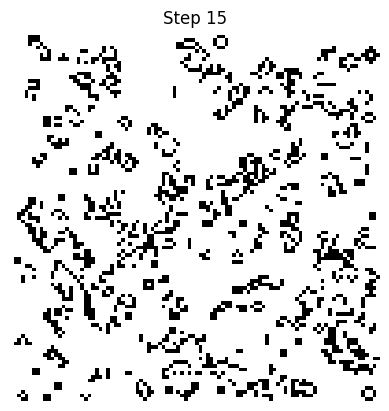

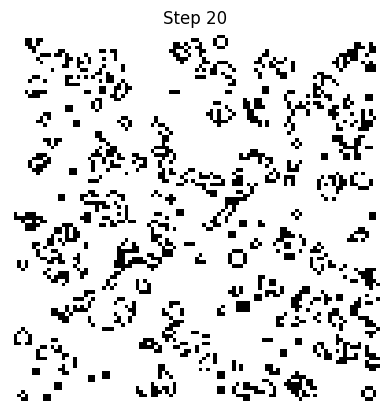

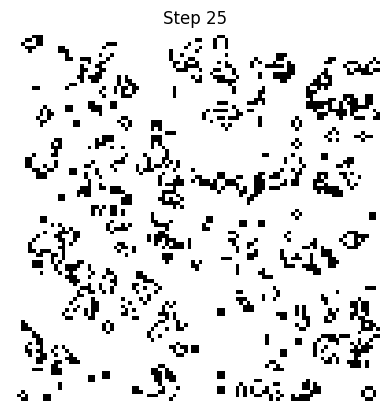

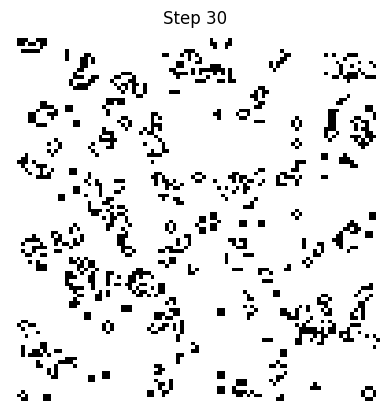

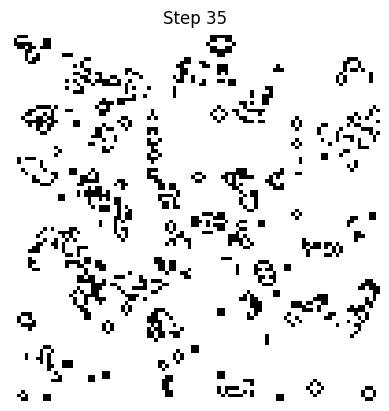

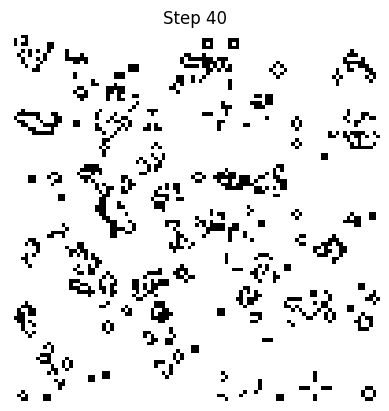

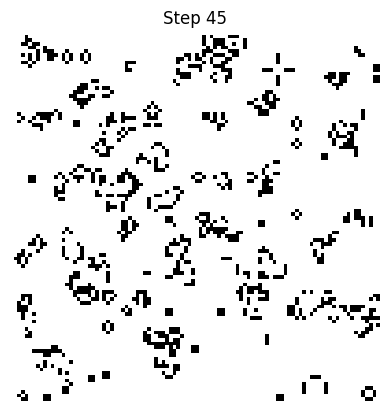

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  Parameters
size = 100  # 100x100 grid
steps = 50  # Number of time steps

#  Generate random binary entropy field (initial state)
entropy_field = np.random.randint(0, 2, (size, size))

#  Function to apply Game of Life rules
def evolve(field):
    # Create an empty grid to store the next generation
    next_field = np.zeros_like(field)
    
    for i in range(size):
        for j in range(size):
            # Count neighbors (8 surrounding cells)
            neighbors = np.sum(field[i-1:i+2, j-1:j+2]) - field[i, j]
            
            # Apply Game of Life rules
            if field[i, j] == 1:
                if neighbors < 2 or neighbors > 3:
                    next_field[i, j] = 0  # Dies due to under/overpopulation
                else:
                    next_field[i, j] = 1  # Stays alive
            else:
                if neighbors == 3:
                    next_field[i, j] = 1  # Becomes alive
    return next_field

#  Simulate evolution over multiple steps
for step in range(steps):
    entropy_field = evolve(entropy_field)
    
    # Visualize every 5 steps
    if step % 5 == 0:
        plt.imshow(entropy_field, cmap='binary')
        plt.title(f"Step {step}")
        plt.axis('off')
        plt.show()


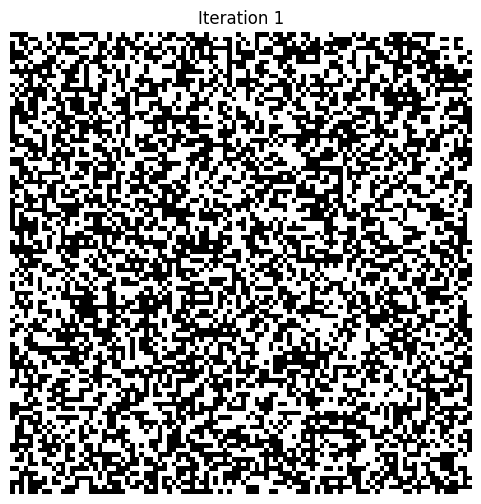

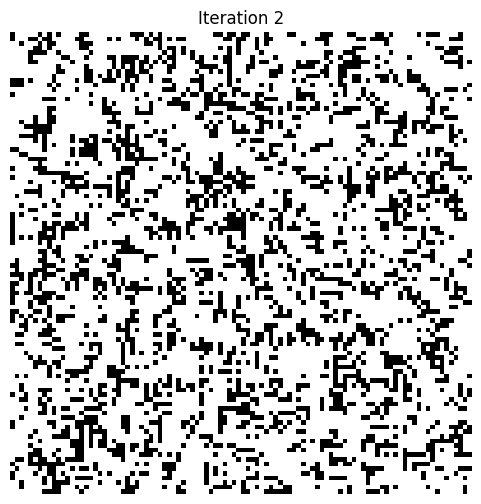

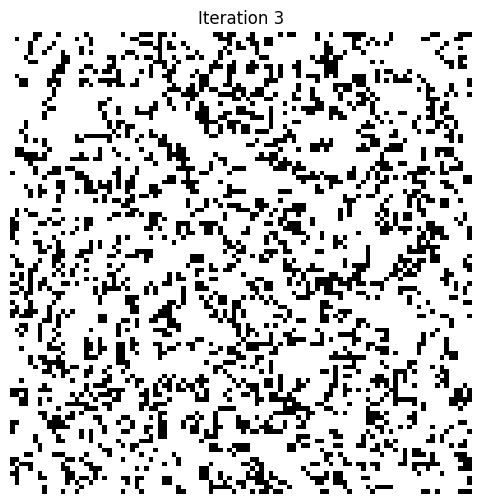

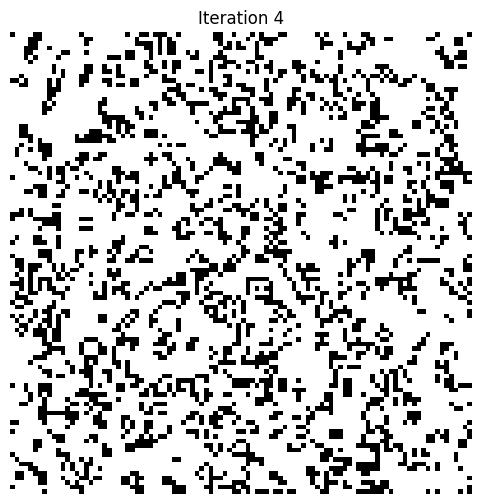

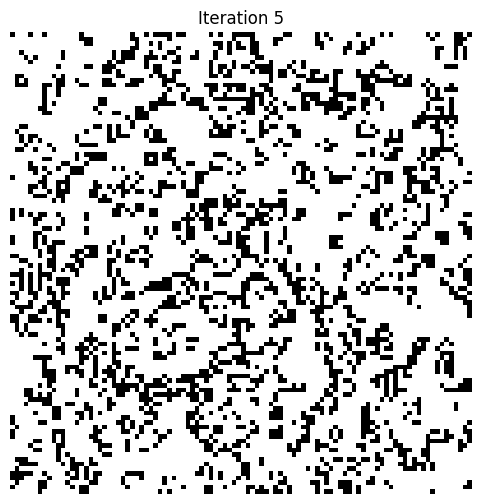

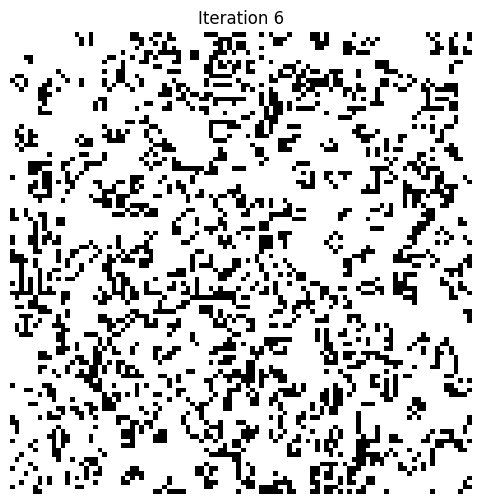

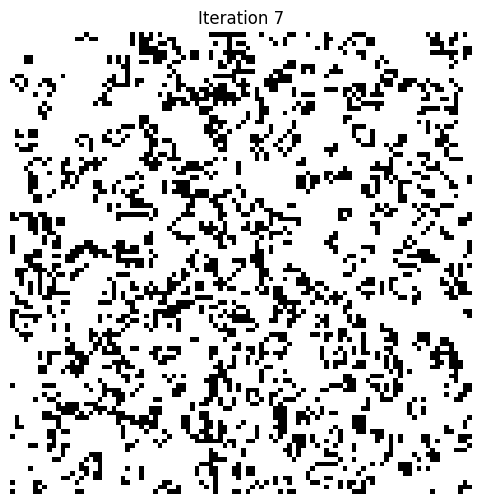

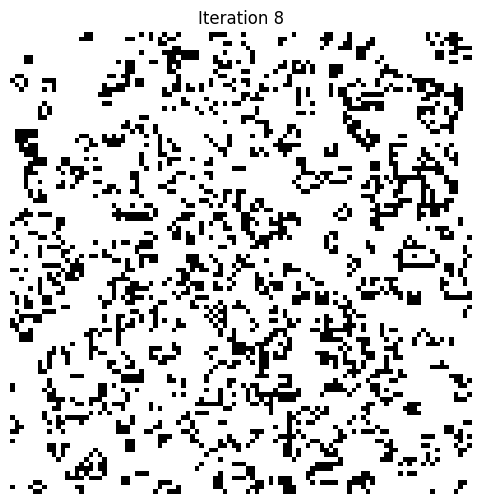

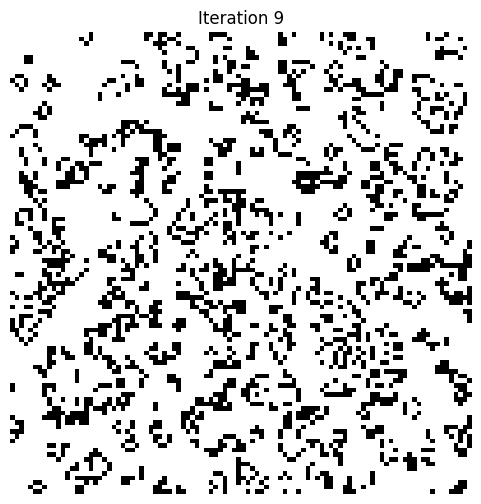

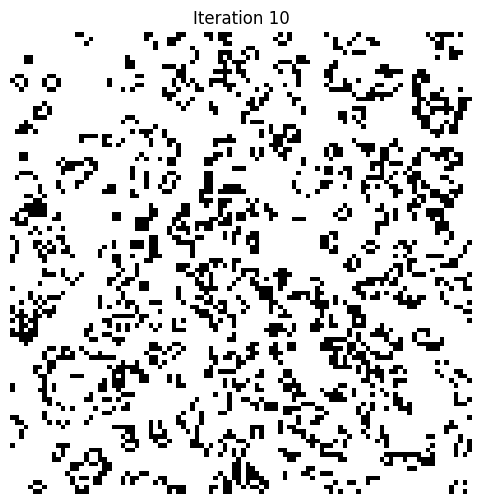

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#  Initialize the entropy field (start with random binary values)
size = 100  # 100x100 grid
field = np.random.randint(0, 2, (size, size))  # Binary entropy field

#  Game of Life Rule - Calculate the next state
def update_field(field):
    # Get the number of live neighbors for each cell
    neighbors = (
        np.roll(field, 1, axis=0) + np.roll(field, -1, axis=0) +
        np.roll(field, 1, axis=1) + np.roll(field, -1, axis=1) +
        np.roll(np.roll(field, 1, axis=0), 1, axis=1) +
        np.roll(np.roll(field, -1, axis=0), 1, axis=1) +
        np.roll(np.roll(field, 1, axis=0), -1, axis=1) +
        np.roll(np.roll(field, -1, axis=0), -1, axis=1)
    )
    
    # Apply Game of Life rules
    new_field = (neighbors == 3) | (field & (neighbors == 2))
    return new_field.astype(int)

#  Visualize the initial field
def visualize_field(field, title="Entropy Field"):
    plt.figure(figsize=(6, 6))
    plt.imshow(field, cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()

#  Run for N iterations
iterations = 10
for i in range(iterations):
    visualize_field(field, title=f"Iteration {i + 1}")
    field = update_field(field)
